# Introduction

## Introductory Text for Colab Notebook

In this notebook, we delve into the foundational concepts of neural networks, following Andrej Karpathy's lecture titled "The spelled-out intro to neural networks and backpropagation: building micrograd." By dissecting neural networks into their core mathematical components and operations, we aim to demystify their inner workings and build a fundamental understanding of how they are trained. The main concepts covered are:

1. **Micrograd Overview**: An introduction to the Micrograd library, which serves as an "autograd" engine to efficiently evaluate the gradient of a loss function concerning a neural network's weights.
  
2. **Neural Networks as Mathematical Expressions**: A deep dive into the realization that neural networks are just structured mathematical expressions with a focus on backpropagation as a general concept.

3. **Understanding Derivatives**: A foundational explanation of derivatives, providing a conceptual understanding of their significance in neural network training.

4. **Backward Function & Topological Sort**: Understanding the importance of topological sorting in backpropagation and implementing a backward function for an entire expression graph.

5. **Building a Neural Network in Micrograd**: From constructing individual neurons to building a multi-layer perceptron (MLP), this segment details the process of creating a neural network from the ground up.

6. **Gradient Descent Optimization**: A comprehensive look at the optimization technique vital for training neural networks, detailing its process, challenges, and its real-world implementation in frameworks like PyTorch.


## Summary of transcript

**Introduction**
- The lecturer, Andrej, introduces the topic of deep neural networks and explains that he will provide an in-depth look at what happens under the hood during neural network training.

**Micrograd Overview**
- Micrograd is a library released by Andre on GitHub.
- It's an autograd engine, with "autograd" meaning "automatic gradient".
- The primary purpose of Micrograd is to implement backpropagation, which allows for the efficient evaluation of the gradient of a loss function concerning a neural network's weights.
- Modern deep neural network libraries, like PyTorch and Jaxx, rely on backpropagation.
- Andrej provides an illustrative example, demonstrating how Micrograd can build mathematical expressions. The library can perform operations like addition, multiplication, power, division, etc.
- Micrograd can also perform a backward pass, which initiates backpropagation. This helps in evaluating the derivative of the output concerning various internal nodes and inputs.

**Neural Networks as Mathematical Expressions**
- Andrej emphasizes that neural networks are just mathematical expressions. While the example provided earlier was arbitrary, neural networks are more structured yet based on the same foundational concepts.
- Backpropagation is a general concept and doesn't just apply to neural networks.
- Andrej mentions that Micrograd works on scalar values, which is not efficient for production but is pedagogically useful.

**Simplicity of Micrograd**
- Micrograd's core engine consists of just 100 lines of Python code.
- The neural network library built on top of Micrograd is also very concise, focusing on the essential concepts of neurons, layers, and multi-layer perceptrons.

**Understanding Derivatives**
- Andrej delves into the fundamental concept of derivatives, using a simple function as an example.
- He explains the definition of a derivative and shows how to compute it numerically for a scalar function.
- The slope of the function at various points is discussed, providing an intuitive understanding of the derivative's meaning.

**Derivative of a Function with Multiple Inputs**
- The lecture progresses to a more complex case where the function has multiple inputs.
- Andrej demonstrates how to compute the derivative of the function concerning each input and interprets the results.

**Closing Remarks**
- The lecture aims to provide foundational knowledge before diving into neural networks.

---

The lecturer provided a comprehensive exploration of how automatic differentiation works in deep learning. Here's a summary of the key points:

1. **Value Object**: The core of the system is a 'Value' object that contains a scalar value. This object serves as the foundation for building mathematical expressions.
  
2. **Mathematical Expressions**: Neural networks can be thought of as large mathematical expressions. These expressions are built using various operations like addition and multiplication.

3. **Operator Overloading**: Python's magic methods (e.g., `__add__`, `__mul__`) are used to define how Value objects should be combined using basic arithmetic operations. This is the essence of operator overloading.

4. **Constructing Expressions**: By using these overloaded operations, complex mathematical expressions can be built from Value objects.

5. **Expression Graph**: As the mathematical expressions are constructed, a graph is built in the background. This graph captures the relationships between Value objects and the operations that produce them.

6. **Visualizing the Graph**: A visualization tool displays the expression graph, helping to visually understand the flow of computations.

7. **Backpropagation**: The core of training neural networks. Starting from the end of the graph, the gradient (or derivative) is propagated backward. This gradient indicates how much a small change in a Value object would affect the final output.

8. **Chain Rule**: A fundamental calculus principle used during backpropagation. It allows the computation of derivatives through function compositions. If a variable \( z \) depends on \( y \), which depends on \( x \), then the derivative of \( z \) with respect to \( x \) can be computed by chaining the derivatives together.

9. **Gradient Computation**: Using the chain rule, the gradient of the output with respect to each Value object in the graph is computed. This gradient indicates how sensitive the output is to a change in that Value.

10. **Gradient Verification**: After computing the gradients, they are verified using a numerical approach. By slightly perturbing each Value and observing the change in the output, the computed gradient can be cross-checked.

The lecture emphasized the importance of understanding backpropagation and the chain rule in neural network training. By manually implementing and visualizing these concepts, one gains a deeper appreciation for the intricate dance of operations that allow neural networks to learn from data.

---

**Preview of a Single Optimization Step**
- The goal is to nudge inputs to increase the value of \( l \).
- For optimization, inputs such as \( a \), \( b \), \( c \), and \( f \) should increase in the direction of the gradient by a small step amount. This is known as the step size.
- By nudging all values in the direction of the gradient, the expectation is that \( l \) will become less negative.

**Manual Backpropagation Example #2: A Neuron**
- A neuron in the context of neural networks is discussed. Neurons have inputs (\( x \)) and weights (\( w \)) associated with synapses.
- The neuron also has a bias, which can make it more or less "trigger happy."
- The output of the neuron is the activation function applied to the dot product of the weights and the inputs.
- The tanh function is used as an example activation function. It squashes its input values between -1 and 1.

**Implementing Backward Function for Operations**
- Instead of doing backpropagation manually, the backward function is introduced to automate the process.
- The backward function uses the chain rule from calculus to propagate gradients backward in the computation graph.
- For addition, the gradient simply flows to both inputs equally.
- For multiplication, the gradient of one input is the value of the other input multiplied by the gradient of the output.
- For the tanh function, the gradient is \( 1 - \text{{tanh}}^2(x) \).

**Backpropagation Through a Neuron Example**
- An example neuron is set up, taking two inputs, \( x1 \) and \( x2 \), and two weights, \( w1 \) and \( w2 \).
- Backpropagation is performed by calling the backward function on each node in the computation graph.
- This process propagates the gradient from the output of the neuron back to its inputs and weights.
- Using the backward function automates the gradient computation and makes backpropagation easier to manage.

In summary, this lecture segment provided a deep dive into the mechanics of backpropagation, starting with the intuition of nudging inputs to optimize a value, followed by the manual backpropagation process for a neuron, and then introducing a more automated approach using the backward function.

---

### Summary

## Backward Function and Topological Sort

- The lecturer discussed the need to implement a backward function for an entire expression graph.
- The process involves going backward through a mathematical expression to ensure that the backward function of a node is called only after all its subsequent nodes have been processed.
- This ordering can be achieved using a technique called topological sort. In topological sort, all edges of a graph are directed from left to right.
  
## Building a Topological Graph

- A topological graph is built by maintaining a set of visited nodes.
- Starting from a root node, the function checks if a node has been visited. If not, it marks it as visited and then iterates through all of its children.
- A node is only added to the topological list after all of its children have been processed.
  
## Backpropagation Implementation

- The process starts by setting the gradient of the output node to 1.
- Next, the topological order of nodes is built.
- Nodes are processed in reverse order, ensuring that each node's backward function is called only after its children.
  
## Addressing Backpropagation Bugs

- A potential bug arises when a node is used multiple times in computations.
- The gradients should accumulate (using +=) rather than being overwritten.
  
## Implementing Additional Operations

- To create more complex computations, operations like exponentiation, addition, subtraction, and division were added.
- The lecturer demonstrated how to achieve operations like division by using a combination of multiplication and the power function.
  
## PyTorch Comparison

- PyTorch, a modern deep learning library, offers a similar approach but at a more efficient scale.
- In PyTorch, computations are done using tensors (n-dimensional arrays).
- Tensors in PyTorch have `data` and `grad` attributes, similar to the custom implementation.
- Operations on tensors in PyTorch are more efficient due to parallel processing capabilities.

In conclusion, the lecturer demonstrated the principles of backpropagation, the importance of topological sorting in the process, and provided a practical implementation using a custom solution and compared it with PyTorch.

---

**Building a Neural Network Library in Micrograd**

1. **Introduction to Neural Networks in Micrograd**
   - Neural networks are specialized mathematical expressions.
   - The goal is to build a two-layer multi-layer perceptron (MLP).
   
2. **Constructing a Single Neuron**
   - Started with an individual neuron implementation.
   - Adopted PyTorch API design for neural network modules.
   - The neuron has inputs and associated weights. It also has a bias that influences its activation.
   - The neuron's functionality is essentially a dot product of its inputs and weights, added to its bias.

3. **Constructing a Layer of Neurons**
   - A layer consists of multiple neurons.
   - Each neuron in a layer is fully connected to the input but not to other neurons in the same layer.
   - Implemented a layer as a list of neurons.

4. **Building a Multi-Layer Perceptron (MLP)**
   - An MLP has multiple layers, with each layer feeding into the next.
   - Defined the MLP using lists of layers, where each layer contains a set of neurons.
   - The MLP takes in a sequence of inputs and produces outputs by passing through its layers sequentially.

5. **Loss Calculation for Neural Networks**
   - Created a simple dataset with four examples to evaluate the neural network.
   - Implemented a loss function (Mean Squared Error) to measure the performance of the network.
   - The goal is to minimize the loss, indicating that the network's predictions are close to the desired targets.

6. **Backpropagation and Adjusting Weights**
   - After calculating the loss, backpropagation is used to calculate gradients for all parameters in the network.
   - These gradients indicate how much each parameter should be adjusted to reduce the loss.
   - Visualized the computational graph of the entire MLP using the `draw` function, showcasing the complexity of the forward and backward passes.

7. **Gathering All Parameters for Adjustments**
   - Added functionality to collect all parameters (weights and biases) of the network into one array.
   - This simplifies the process of adjusting all parameters based on their gradients.

In summary, the lecture covered the process of building a neural network (specifically an MLP) from scratch using the Micrograd library, defining a loss function, and implementing backpropagation to adjust the network's parameters for better predictions.

---

**Gradient Descent Optimization and Training Neural Networks**
- Neural networks make predictions and have different outcomes and loss values.
- Neurons have gradients and values associated with them.
- By examining gradients, one can determine how the network should adjust to improve accuracy.
- The process involves iterating over every parameter in the neural net and adjusting its data based on the gradient.
  
**Understanding Gradient Descent**
- The gradient is viewed as a vector pointing towards increased loss.
- To minimize the loss, the gradient's direction is reversed (hence the negative sign).
- Adjustments are made using a step size multiplied by the gradient.
- If the step size is too large, the optimization can overshoot and cause instability.
  
**Optimization Process**
- The process involves a forward pass to calculate predictions, followed by a backward pass to compute gradients.
- After obtaining the gradients, parameters are updated.
- This cycle continues until the network's predictions are satisfactory or converge.

**Challenges in Neural Network Training**
- Setting the right learning rate or step size is crucial. Too small, and convergence is slow; too large, and the model may become unstable.
- Proper initialization and gradient reset are essential to avoid accumulated errors or bugs.
  
**Summary of Neural Networks**
- Neural networks are mathematical expressions taking in data and weights, processing through forward passes, and comparing outputs to desired targets using a loss function.
- The goal is to minimize this loss, which indicates the network's accuracy.
- This optimization process, known as gradient descent, adjusts parameters iteratively to reduce the loss.
  
**Diving into Real-Life Frameworks: PyTorch**
- In real-world frameworks like PyTorch, the implementation is more complex.
- PyTorch's architecture supports CPU and GPU operations.
- Adding custom functions requires defining both forward and backward passes.
  
**Conclusion**
- The process of training a neural network involves understanding and adjusting gradients to minimize loss.
- While simple neural networks can be trained manually, real-world applications using frameworks like PyTorch offer more flexibility and power but come with added complexity.








# The Value Object

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x):
  return 3*x**2 - 4*x + 5

In [ ]:
f(3.0)

20.0

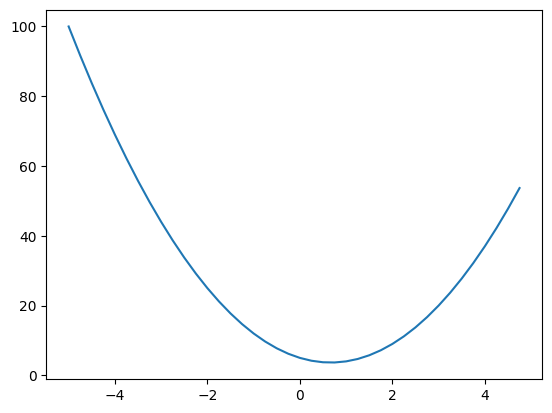

In [ ]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

Yes, the expression

$$
\frac{f(x+h) - f(x)}{h}
$$

is known as the **difference quotient**. It represents the average rate of change of the function \( f \) over the interval \( h \).

The derivative of \( f \) at a point \( x \) is defined as the limit of this difference quotient as \( h \) approaches 0:

$$
f'(x) = \lim_{{h \to 0}} \frac{f(x+h) - f(x)}{h}
$$

When you take this limit, you're finding the instantaneous rate of change of \( f \) at the point \( x \), which is the slope of the tangent line to the curve of \( f \) at that point. If the limit exists, then \( f \) is said to be differentiable at \( x \), and the value of the limit is the derivative of \( f \) at \( x \).

In [ ]:
h = 0.0001
x = 3
(f(x+h) - f(x))/h

8.000300000023941

A few examples to improve differential intuition

In [ ]:
# les get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [ ]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [ ]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [ ]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


Graph drawing function

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

Start to build up Value class

In [ ]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label
    self.grad = 0.0

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    return out


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

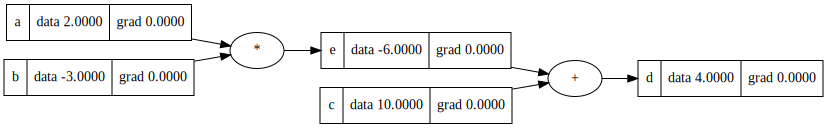

In [ ]:
draw_dot(d)

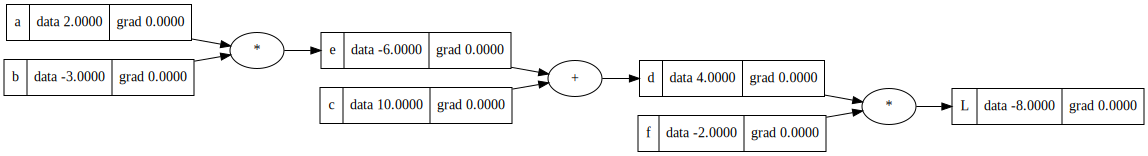

In [ ]:
draw_dot(L)

In [ ]:
def lol():

  h = 0.001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  a.data += h
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)

lol()

6.000000000000227


In [ ]:
def lol():

  h = 0.001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  b.data += h
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)

lol()

-3.9999999999995595


# Backpropagation


---

### Manual Backpropagation: Building Intuition

Before we delve into automating backpropagation, it's invaluable to manually walk through the process. This hands-on approach sharpens our understanding and intuition about how gradients flow backward through a computational graph.

#### Starting Point: The Loss Gradient

We begin with the final node, the Loss \( L \). The gradient of the loss with respect to itself, \( $\frac{dL}{dL}$ \), is trivially \( 1 \). This is because any quantity differentiated with respect to itself is always \( 1 \). In the code, this is updated as `L.grad = 1`.

#### Multiplying Nodes: A Simple Case

Considering the equation \( L = d $\times$ f \), we want to find out how the loss changes concerning small changes in \( d \) and \( f \).

For multiplication, backpropagation is straightforward:

- The gradient of \( L \) with respect to \( d \) is \( f \). In other words, \( $\frac{dL}{dd}$ = f \).
- The gradient of \( L \) with respect to \( f \) is \( d \). Similarly, \( $\frac{dL}{df}$ = d \).

This makes intuitive sense: if we increase \( d \) by a tiny amount, the change in \( L \) would be proportional to the current value of \( f \), and vice versa.

In the code, this understanding is captured as:
```python
d.grad = f.data
f.grad = d.data
```

#### Visualizing the Computational Graph

To help us visually grasp the flow of gradients, the function `draw_dot` is employed. This function renders the computational graph, showing each node's data and gradient values. By visualizing the graph, we can get a clearer picture of the relationships between nodes and how gradients propagate through the network.

#### Why Go Through This Manual Process?

Manually computing gradients and visualizing the graph serves a dual purpose:

1. **Deep Understanding:** By manually computing and updating gradients, we get an intimate understanding of backpropagation's inner workings.
2. **Verification:** Later, when we implement automatic backpropagation, this manual process will serve as a reference. If our automated gradients match our manual computations, it's a good indication that our implementation is correct.

---

The subsequent cells in the notebook will delve deeper into automating this process, but this manual walkthrough sets a strong foundation.

---


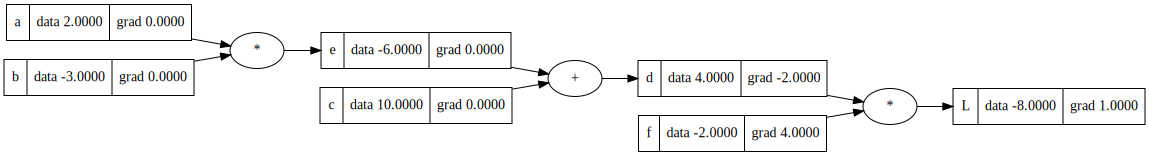

In [ ]:
L.grad = 1.0
d.grad = f.data
f.grad = d.data
draw_dot(L)

---

### **Note: It is VERY IMPORTANT to fully understand the backpropagation of this "+" node.**

Let's slowly walk through the computation for \( $\frac{dL}{dc}$ \) and \( $\frac{dL}{de}$ \) in the context of backpropagation.

---

### Slow-Motion Backpropagation: Computing \( $\frac{dL}{dc}$ \) and \( $\frac{dL}{de}$ \)

Having determined the gradients \( $\frac{dL}{dd}$ \) and \( $\frac{dL}{df}$ \), we can now move a step backward in the computational graph to compute the gradients with respect to \( c \) and \( e \).

#### Starting from the Relationship: \( d = e + c \)

To begin with, let's look at the equation \( d = e + c \).

1. **Gradient with respect to \( c \)**:

   For addition operations, the gradient of the output with respect to any of the inputs is 1. This is because a small change in \( c \) will result in an equal change in \( d \). Formally, \( $\frac{dd}{dc}$ = 1 \).

   Now, using the chain rule, we can compute \( $\frac{dL}{dc}$ \). The chain rule states:

   $$
   \frac{dL}{dc} = \frac{dL}{dd} \times \frac{dd}{dc}
   $$

   Given that \( $\frac{dd}{dc}$ = 1 \) and \( $\frac{dL}{dd}$ \) (which we've already computed), you can find \( $\frac{dL}{dc}$ \).

2. **Gradient with respect to \( e \)**:

   Similarly, a tiny change in \( e \) will lead to an equal change in \( d \). Therefore, \( $\frac{dd}{de}$ = 1 \).

   Using the chain rule again:

   $$
   \frac{dL}{de} = \frac{dL}{dd} \times \frac{dd}{de}
   $$

   With \( $\frac{dd}{de}$ = 1 \) and the previously computed \( $\frac{dL}{dd}$ \), we can determine \( $\frac{dL}{de}$ \).

### Updating the Gradients in Code:

To capture this understanding in the code, you can update the gradients for \( c \) and \( e \) as:

```python
c.grad = d.grad * 1  # This essentially means c.grad = d.grad
e.grad = d.grad * 1  # Similarly, e.grad = d.grad
```

#### Why This Step is Crucial:

By computing \( $\frac{dL}{dc}$ \) and \( $\frac{dL}{de}$ \), we're uncovering how changes to the earlier nodes in our computational graph influence the final loss. This step-by-step backward approach not only deepens our understanding but also ensures that every node in our network gets the gradient information it needs for subsequent optimization (like gradient descent).

---

This manual, slow-motion process of backpropagation allows us to see the inner workings of gradient computation, preparing us for more automated and generalized backpropagation approaches in larger networks.

Let's delve deeper into why \( $\frac{dd}{dc}$ = 1 \) for the equation \( d = e + c \).

### Understanding the Relationship: \( d = e + c \)

For the equation \( d = e + c \), when we differentiate with respect to \( c \), we're essentially asking the question: "If we make a tiny change in \( c \), how does \( d \) change in response?"

Given that \( c \) is added directly to form \( d \), any tiny change in \( c \) will result in an equal change in \( d \). For example, if you increase \( c \) by 0.001, \( d \) will also increase by 0.001.

### The Derivative

Mathematically, the derivative \( $\frac{dd}{dc}$ \) represents the rate of change of \( d \) with respect to changes in \( c \). In the context of our equation, since \( d \) changes at the exact same rate as \( c \), this derivative is 1.

### Local Derivative

The term "local derivative" refers to the derivative of a function concerning one of its immediate variables, without considering the larger network or system in which it operates. In the context of backpropagation in neural networks, local derivatives are the derivatives of the operations themselves, without considering the rest of the network.

For our equation \( d = e + c \), the local derivative \( $\frac{dd}{dc}$ \) is 1. This local derivative is crucial for computing the gradient \( $\frac{dL}{dc}$ \) using the chain rule. The chain rule allows us to combine local derivatives to compute gradients concerning the final output (in this case, the loss \( L \)).

### Numerical Estimation

We can verify our understanding with a numerical estimate. Using the difference quotient:

\$$
\frac{f(c+h) - f(c)}{h}
$$

Where \( f(c) \) represents \( d \) for a given value of \( c \), and \( h \) is a small value. If our understanding is correct, this quotient should be approximately 1 for any value of \( h \).

### Example:

Let's say \( e = 5 \) and \( c = 3 \). Then \( d = e + c = 8 \).

Now, let's perturb \( c \) by a tiny amount \( h = 0.001 \).

With this change, \( c' = 3.001 \) and \( d' = e + c' = 8.001 \).

Using the difference quotient:
$$
\frac{d' - d}{h} = \frac{8.001 - 8}{0.001} = 1
$$

This confirms our understanding that \( $\frac{dd}{dc}$ = 1 \).

### Concluding Thoughts

By understanding the local derivative \( $\frac{dd}{dc}$ \), we're better equipped to compute the gradient \( $\frac{dL}{dc}$ \) using the chain rule. This local-to-global approach is at the heart of backpropagation, allowing us to efficiently compute gradients in complex neural networks.

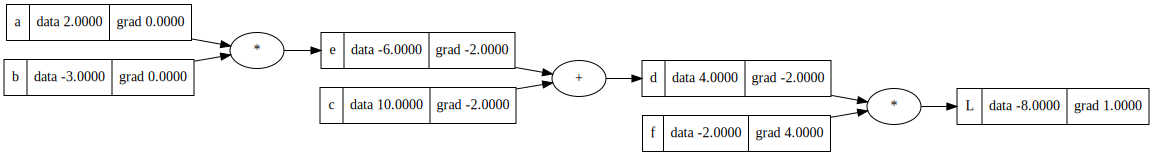

In [ ]:
c.grad = d.grad * 1  # This essentially means c.grad = d.grad
e.grad = d.grad * 1  # Similarly, e.grad = d.grad
draw_dot(L)

---

### Verifying the Local Derivative Using Numerical Estimation

To bolster our understanding of the local derivative \( $\frac{dd}{dc}$ \), we can turn to numerical estimation. By perturbing the value of \( c \) slightly and observing the resulting change in the loss \( L \), we can approximate the gradient \( $\frac{dL}{dc}$ \).

The provided function, `lol`, does precisely this:

1. It first computes the loss \( L \) with the original value of \( c \), denoted as `L1`.
2. It then adds a tiny value \( h \) to \( c \) and recalculates the loss, denoted as `L2`.
3. The estimated gradient is computed as \( $\frac{L2 - L1}{h}$ \) and printed.

If our earlier understanding that \( $\frac{dd}{dc}$ = 1 \) is correct, this numerical estimate should yield a value very close to the one obtained from the multiplication operation's backpropagation.

Executing the `lol` function offers a practical way to verify our theoretical derivations with empirical results.

---

In [ ]:
def lol():

  h = 0.001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  c.data += h
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)

lol()

-1.9999999999988916


In [ ]:
def lol():

  h = 0.001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  e.data += h
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)

lol()

-2.000000000000668


---

### Continuing Backward: Calculating the Gradient for Node \( a \)

As we further traverse the computational graph backwards, our next stop is node \( a \). Given the relationship \( e = a $\times$ b \), our goal is to compute the gradient \( $\frac{dL}{da}$ \).

#### Multiplication and the Chain Rule

For the multiplication operation, the gradient of the output with respect to one of its inputs is equal to the value of the other input. This is because a small change in one input will cause the output to change by an amount proportional to the value of the other input.

Formally, for \( e = a \times b \):

1. The local derivative \( $\frac{de}{da}$ \) is \( b \). This captures the rate of change of \( e \) concerning changes in \( a \).
2. The local derivative \( $\frac{de}{db}$ \) is \( a \). This captures the rate of change of \( e \) concerning changes in \( b \).

However, we're interested in how changes in \( a \) (or \( b \)) affect our final loss \( L \), not just the intermediate value \( e \). For this, we apply the chain rule of differentiation.

Using the chain rule, the gradient of the loss \( L \) with respect to \( a \) is:

$$
\frac{dL}{da} = \frac{dL}{de} \times \frac{de}{da}
$$

Given:
- \( $\frac{de}{da}$ = b \) (from our multiplication operation)
- \( $\frac{dL}{de}$ \) (which we've already computed in previous steps)

We can find \( $\frac{dL}{da}$ \) by multiplying these two values.

#### Intuition Behind the Chain Rule

The chain rule can be thought of as a way to "chain" or link local effects (how \( a \) changes \( e \)) with global effects (how changing \( e \) impacts \( L \)). This chaining of local and global changes is the essence of backpropagation.

---

Alright, let's break down the calculation for the gradient \( $\frac{dL}{da}$ \) given the computational graph.

### Given:

We have the following relationships:
1. \( e = a $\times$ b \)
2. \( d = e + c \)
3. \( L = d $\times$ f \)

We've already computed the gradients for \( L, d, f, c, \) and \( e \). Now, we'll compute the gradient for \( a \).

### Computing \( $\frac{dL}{da}$ \):

Given that \( e = a $\times$ b \):

1. The local derivative \( $\frac{de}{da}$ \) is \( b \) (from the multiplication operation). This represents the rate of change of \( e \) concerning changes in \( a \).

Using the chain rule, the gradient of \( L \) with respect to \( a \) is:

$$
\frac{dL}{da} = \frac{dL}{de} \times \frac{de}{da}
$$

Given:
- \( $$\frac{de}{da}$$ = b \) (from our multiplication operation)
- \( $$\frac{dL}{de}$$ \) (which is already computed)

Substitute the values in:

$$
\frac{dL}{da} = \frac{dL}{de} \times b
$$

### In Code:

You would update the gradient for `a` as:

```python
a.grad = e.grad * b.data
```

This line computes the gradient \( $\frac{dL}{da}$ \) by multiplying the gradient of \( e \) (i.e., \( $\frac{dL}{de}$ \)) with the value of \( b \).

By following this process, you've successfully backpropagated the gradient through the node \( a \) in the computational graph.

#### In Conclusion

By understanding and applying the chain rule at each step, especially at multiplication nodes, we can efficiently compute the gradient of the loss with respect to any node in our computational graph. This step-by-step approach is foundational for updating weights in neural networks, leading to learning and model optimization.

---

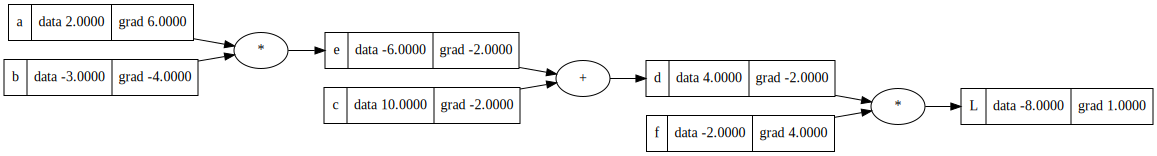

In [ ]:
a.grad = e.grad * b.data
b.grad = e.grad * a.data
draw_dot(L)

---

### Verifying the Local Derivative Using Numerical Estimation

For a and b

In [ ]:
def lol():

  h = 0.001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label='a')
  a.data += h
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)

lol()

6.000000000000227


In [ ]:
def lol():

  h = 0.001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  b.data += h
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)

lol()

-3.9999999999995595


Certainly! Let's embark on a comprehensive walkthrough of the manual backpropagation process that has been implemented so far.

---

### Manual Backpropagation: A Journey from \( L \) to the Leaf Nodes

Backpropagation is the cornerstone technique that allows neural networks to learn from errors. It revolves around calculating the gradient of a loss function with respect to each weight by the chain rule, and then adjusting the weights in the direction that decreases the loss.

#### Starting Point: The Loss \( L \)

We began at the end of the computational graph with the Loss \( L \). The gradient of the loss with respect to itself, \( $\frac{dL}{dL}$ \), is always \( 1 \), because any quantity differentiated with respect to itself is unity.

#### Moving Backward: The Multiplication Node \( $L = d \times f$ \)

From \( L \), we moved to its immediate predecessors, \( d \) and \( f \). We observed that:
- The gradient of \( L \) with respect to \( d \) is \( f \), and vice versa. This is because multiplication is commutative, and a tiny change in \( d \) will result in a change in \( L \) proportional to \( f \).

This step was a local application of the chain rule.

#### Further Back: The Addition Node \( $d = e + c$ \)

Next, we tackled the node \( d \). Here, \( d \) is a result of adding \( e \) and \( c \). The local derivatives are straightforward for addition:
- \( $\frac{dd}{de}$ = 1 \) and \( $\frac{dd}{dc}$ = 1 \).

Using these, we computed:
- \( $\frac{dL}{de}$ = $\frac{dL}{dd} \times \frac{dd}{de}$ \)

- \( $\frac{dL}{dc} = \frac{dL}{dd} \times \frac{dd}{dc}$ \)

This step again showcased a local application of the chain rule.

#### Delving Deeper: The Multiplication Node \( $e = a \times b$ \)

At this point, we backpropagated further to node \( e \) and its predecessors \( a \) and \( b \). For multiplication:
- The gradient of \( e \) with respect to \( a \) is \( b \), and vice versa.

With the local derivatives and previously computed gradient for \( e \), we found:
- \( $\frac{dL}{da} = \frac{dL}{de} \times b$ \)

This step, like the previous ones, is a local application of the chain rule.

#### The Recursive Nature of Backpropagation

Throughout this journey, there’s an evident pattern:

1. **Understanding the Operation:** At each node, we understand the operation that produced the node's value (be it addition, multiplication, etc.).
2. **Computing Local Derivatives:** We compute the local derivatives at that node, representing how the node's value changes with respect to its immediate inputs.
3. **Applying the Chain Rule:** Using the chain rule, we combine these local derivatives with the gradients we have already computed from subsequent nodes to get the gradients for the current node's inputs.
4. **Using Pointers to Traverse:** We use the pointers to the children nodes to move backward recursively through the graph.

This approach is a piece-by-piece, local-to-global, recursive application of the chain rule. It ensures that every node in the computation graph receives the gradient information it needs, which in turn is used to adjust the model's parameters and reduce the loss.

---

In essence, our manual backpropagation is a systematic walk backward through the computational graph, recursively applying the chain rule to propagate gradients from the output all the way to the leaf nodes. This step-by-step process illuminates the inner workings of backpropagation, which, in more complex systems, gets automated but fundamentally remains the same.

In [ ]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'

# Compute gradients using backpropagation
L.grad = 1.0
d.grad = f.data
f.grad = d.data
c.grad = d.grad * 1
e.grad = d.grad * 1
a.grad = e.grad * b.data
b.grad = e.grad * a.data

L

Value(data=-8.0)

In [ ]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'

# Compute gradients using backpropagation
L.grad = 1.0
d.grad = f.data
f.grad = d.data
c.grad = d.grad * 1
e.grad = d.grad * 1
a.grad = e.grad * b.data
b.grad = e.grad * a.data

# Update a.data using gradient descent
a.data += 0.01 * a.grad

# Recompute the forward pass to get the new value of L with the updated a.data
e = a*b
d = e + c
L = d * f

L


Value(data=-7.640000000000001)

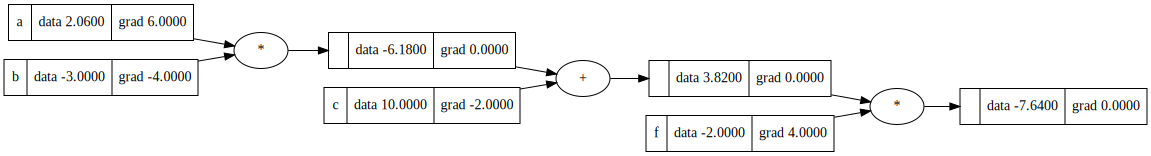

In [ ]:
draw_dot(L)

The code `a.data += 0.01 * a.grad` is performing a gradient descent update on the value of `a.data` based on its gradient `a.grad`.

Let's break it down:

1. **`a.grad`**: This represents the gradient (or derivative) of the loss with respect to `a.data`. In other words, it indicates how much the loss function will change if `a.data` is changed by a tiny amount. A positive gradient means increasing `a.data` will increase the loss, while a negative gradient means increasing `a.data` will decrease the loss.
2. **`0.01`**: This is known as the learning rate. It determines the step size during the gradient descent update. By multiplying the gradient with this value, we scale down the update to avoid making too large a change to `a.data` which might overshoot the optimal value.
3. **`a.data +=`**: This is updating the value of `a.data` by adding the computed adjustment (i.e., the product of the learning rate and the gradient). The goal of this update is to reduce the loss.


```
Starting Value of 'a': a.data
Gradient of Loss with respect to 'a': a.grad
Learning Rate: 0.01

Gradient Update: Adjustment = 0.01 * a.grad
New Value of 'a': a.data = a.data + Adjustment
```

The statement `a.data += 0.01 * a.grad` is a shorthand that combines multiplication and addition. Here's the long form in Python:

```python
# Step 1: Compute the product of the learning rate (0.01) and the gradient
gradient_update = 0.01 * a.grad

# Step 2: Add the computed product to the current value of a.data
a.data = a.data + gradient_update
```

In Python, the multiplication (`*`) operator has higher precedence than the addition (`+`) operator, so in the original shorthand, `0.01 * a.grad` gets computed first, and then its result gets added to `a.data`. Breaking it down into multiple steps, as shown above, can make the operations more explicit and clear.

---

Essentially, the code is adjusting the value of `a.data` in the direction that decreases the loss, with the magnitude of the adjustment being controlled by the learning rate and the gradient. This is a basic step in the gradient descent optimization algorithm used in training neural networks and other machine learning models.


In [ ]:

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'

# Compute gradients using backpropagation
L.grad = 1.0
d.grad = f.data
f.grad = d.data
c.grad = d.grad * 1
e.grad = d.grad * 1
a.grad = e.grad * b.data
b.grad = e.grad * a.data

L


Value(data=-8.0)

In [ ]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'

# Compute gradients using backpropagation
L.grad = 1.0
d.grad = f.data
f.grad = d.data
c.grad = d.grad * 1
e.grad = d.grad * 1
a.grad = e.grad * b.data
b.grad = e.grad * a.data

# Update a.data using gradient descent
b.data += 0.01 * a.grad

# Recompute the forward pass to get the new value of L with the updated a.data
e = a*b
d = e + c
L = d * f

L

Value(data=-8.24)

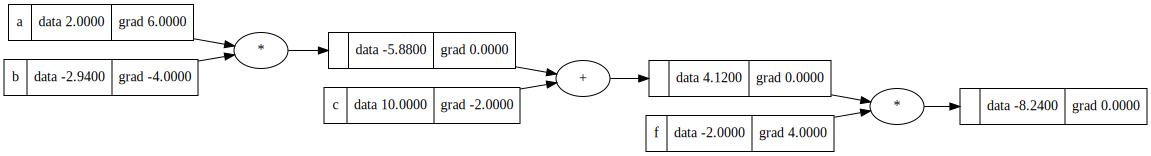

In [ ]:
draw_dot(L)

---

### Exploring the Effects of Parameter Updates on \( L \)

In our computational graph, we observed two distinct effects when updating parameters \( a \) and \( b \) with respect to the loss \( L \):

1. **Updating Parameter \( a \):**
    - **Action:** An increase in the value of \( a \).
    - **Outcome:** A corresponding decrease in \( L \).
    - **Interpretation:** This suggests that, at the current value of \( a \), the parameter is inversely related to \( L \). Meaning, as \( a \) increases, \( L \) decreases. This relationship could be due to the specific structure and operations in our computational graph. When optimizing, it may be beneficial to increase \( a \) to minimize \( L \), given the current context.

2. **Updating Parameter \( b \):**
    - **Action:** An increase in the value of \( b \).
    - **Outcome:** A corresponding increase in \( L \).
    - **Interpretation:** Contrary to \( a \), increasing \( b \) leads to an increase in \( L \), indicating a direct relationship between \( b \) and \( L \). In the context of optimization, it suggests that to reduce \( L \), we might need to decrease the value of \( b \).

### Reflecting on the Observations:

The contrasting effects of updates on \( a \) and \( b \) emphasize the intricate relationships that parameters can have with the loss in a computational graph. It underscores the importance of understanding the gradient (or direction) in which each parameter should be adjusted to achieve the desired change in the loss. Such insights can be especially valuable when manually tuning or debugging a model, providing guidance on how parameter adjustments might influence the overall outcome.

---

### Exploring the Effects of Parameter Updates on \( L \) Through Gradients

In our computational graph, the gradients of the loss \( L \) with respect to the parameters provide crucial insights into how adjustments to each parameter will influence \( L \). Here's what the gradients tell us:

1. **Updating Parameter \( a \):**
    - **Action:** An increase in the value of \( a \).
    - **Outcome:** A corresponding decrease in \( L \).
    - **Interpretation:** The negative gradient of \( L \) with respect to \( a \) indicates that increasing \( a \) will reduce \( L \). In essence, the gradient acts as a compass, pointing in the direction of the steepest ascent (or increase) for the function. Therefore, a negative gradient suggests that to minimize \( L \), we should move in the positive direction of \( a \).

2. **Updating Parameter \( b \):**
    - **Action:** An increase in the value of \( b \).
    - **Outcome:** A corresponding increase in \( L \).
    - **Interpretation:** A positive gradient of \( L \) with respect to \( b \) suggests that increasing \( b \) will also increase \( L \). This direct relationship, indicated by the gradient, signifies that if our objective is to reduce \( L \), we might need to move in the opposite direction of the gradient, i.e., decrease \( b \).

### Reflecting on the Role of Gradients:

Gradients play a pivotal role in understanding and predicting the effects of parameter adjustments on the loss. They quantify the rate of change of the loss with respect to each parameter. In optimization, especially in gradient descent, these gradients guide the updates, ensuring that parameters are adjusted in a manner that moves towards minimizing (or maximizing) the objective function, which in this context, is \( L \).

By observing the sign and magnitude of these gradients, we gain insights into the relationship between parameters and the loss, guiding our decisions on how to adjust parameters to achieve the desired outcome.

---


---

Let's clarify the scenarios when trying to minimize the absolute value of the loss.

In the context of gradient descent optimization, the gradient provides direction. A positive gradient indicates that increasing the parameter will increase the function value, and vice versa. The action we take (increase or decrease the parameter) depends on the current value of the loss and our objective.

Given that we want to minimize the absolute value of the loss (bring it closer to zero), here are the scenarios:

### Scenario Table

| Current Loss Value | Gradient Sign | Node Value Sign | Desired Action on Node Value | Explanation |
|--------------------|---------------|-----------------|-----------------------------|-------------|
| Positive           | Positive      | Positive        | Decrease                    | Increasing a positive node with a positive gradient will increase the positive loss further. To minimize, we decrease the node. |
| Positive           | Positive      | Negative        | Increase                    | Increasing a negative node with a positive gradient will decrease the positive loss, moving it closer to zero. |
| Positive           | Negative      | Positive        | Increase                    | Increasing a positive node with a negative gradient will decrease the positive loss. |
| Positive           | Negative      | Negative        | Decrease                    | Decreasing a negative node with a negative gradient will reduce the positive loss. |
| Negative           | Positive      | Positive        | Increase                    | Increasing a positive node with a positive gradient will decrease the magnitude of the negative loss, moving it closer to zero. |
| Negative           | Positive      | Negative        | Decrease                    | Decreasing a negative node with a positive gradient will push the negative loss further from zero. To minimize, we increase the node value. |
| Negative           | Negative      | Positive        | Decrease                    | Decreasing a positive node with a negative gradient will push the negative loss further from zero. To minimize, we increase the node value. |
| Negative           | Negative      | Negative        | Increase                    | Increasing a negative node with a negative gradient will decrease the magnitude of the negative loss. |

### Explanation:

- When the loss is positive, we aim to decrease it. If the gradient is also positive, increasing the parameter will increase the loss, so we should decrease the parameter. However, if the gradient is negative, increasing the parameter will decrease the loss.
- Conversely, when the loss is negative, we want to increase it to move it closer to zero. If the gradient is positive, increasing the parameter will do just that. However, if the gradient is negative, increasing the parameter will push the loss further into the negative range, so we should decrease the parameter.

This table provides a comprehensive guide for making decisions on adjusting node values based on the current loss value and gradient sign.

Yes, that's a concise and accurate way to summarize the table's information!

Given that the objective is to minimize the absolute value of the loss (i.e., bring it closer to zero), your observation essentially captures the underlying logic. By multiplying the signs of the Loss value, gradient, and node value, we effectively determine the action to be taken on the node value to move the loss towards zero.

Here's the breakdown:

1. If the result of multiplying the signs is positive:
   - Increase the node value.
   
2. If the result of multiplying the signs is negative:
   - Decrease the node value.

This is a handy rule of thumb to quickly determine the direction of the update for a given node, based on its current value, its gradient, and the current loss value.

---

## Transitioning to a Simple Multi-Layer Perceptron (MLP)

Having laid down the foundational concepts in the introductory section, we now embark on our journey towards constructing a simple Multi-Layer Perceptron (MLP). The MLP, a type of feedforward artificial neural network, consists of multiple layers of nodes in a directed graph, with each layer fully connected to the next one.

### The Hyperbolic Tangent Activation Function

Before diving deep into the architecture and training of our MLP, it's crucial to understand the role of activation functions and their impact on the network's behavior. Activation functions introduce non-linear properties to the network, enabling it to learn from the error and make adjustments, which is essential for learning complex patterns.

One such activation function is the **Hyperbolic Tangent** function, often abbreviated as **tanh**. The tanh function outputs values in the range \([-1, 1]\), making it zero-centered and thus, in certain scenarios, leading to easier training and convergence.

Let's visualize the tanh function:

```python
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2)))
plt.grid()
plt.title("Graph of tanh Function")
plt.xlabel("Input Value")
plt.ylabel("Output Value")
```

The above graph showcases how the tanh function behaves across different input values. Notice how it smoothly transitions from -1 to 1, capturing the essence of its S-shaped curve.

As we progress, we'll see how the tanh function fits into the broader framework of our MLP and aids in its learning process.

---

This text cell provides a smooth transition from the introductory part to the core content, setting the context for the upcoming discussions and implementations related to the MLP.

Text(0, 0.5, 'Output Value')

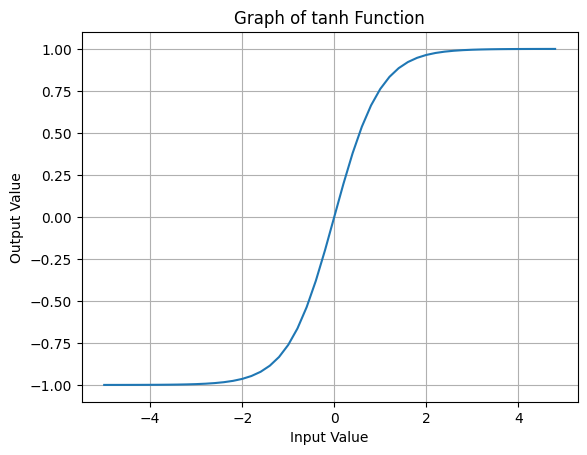

In [ ]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2)))
plt.grid()
plt.title("Graph of tanh Function")
plt.xlabel("Input Value")
plt.ylabel("Output Value")

# Activation Function

The role of activation functions in neural networks is fundamental, and their introduction of non-linearities is central to the power of deep learning models. Let's break down the statement for a more in-depth understanding.

---

### The Role of Activation Functions in Neural Networks

**1. Introduction of Non-linear Properties:**  
Neural networks, at their core, involve a series of linear transformations. These are matrix multiplications by weights followed by additions of biases. If we were to stack multiple layers of just these linear operations, no matter how many, the entire network would still behave like a single-layer linear model. This is because the composition of linear functions is always linear.

Activation functions introduce non-linearities after each linear transformation. When you sandwich a non-linear activation function between two linear layers, the entire composition becomes non-linear. This allows the model to break away from the confines of linearity and enables it to approximate virtually any function, given enough parameters and data.

**2. Learning from Errors and Making Adjustments:**  
The backpropagation algorithm, which is used to train neural networks, relies on gradients or derivatives. These gradients, calculated using the chain rule of calculus, indicate the direction and magnitude to adjust the weights and biases. Activation functions play a vital role in this gradient calculation.

The non-linear nature of activation functions ensures that small changes in weights can result in significant changes in the output, allowing the model to adjust and correct errors. Without non-linearity, the gradients would either be too uniform or flat, making learning from errors challenging.

**3. Essential for Capturing Complex Patterns:**  
Real-world data is rarely linear. Think about images, texts, or intricate patterns and relationships in numerical data. These complexities cannot be captured or represented accurately with just linear transformations. Activation functions, by introducing non-linearities, enable neural networks to learn hierarchical features from data.

For instance, in image recognition, lower layers might learn edges, the next layers might learn shapes by combining edges, and even higher layers might recognize complex structures by combining shapes. This hierarchical feature learning is made possible due to the non-linear transformations introduced by activation functions.

---

In summary, activation functions are pivotal in transforming a neural network from a simple linear regressor to a powerful function approximator capable of learning and representing intricate patterns in data.

The concept of an activation function has its roots in the earliest models of artificial neurons and has evolved alongside the development of artificial neural networks. Let's trace its historical journey:

1. **Biological Inspiration (1940s-1950s):**  
   The idea of artificial neurons was inspired by biological neurons. In biological systems, a neuron fires (or activates) in response to a sufficient amount of input signal. This firing can be seen as an "all-or-nothing" activation function. The first artificial neuron model, the McCulloch-Pitts neuron (1943), had a binary threshold activation, mimicking this biological firing.

2. **Perceptron and Threshold Activation (1957):**  
   The Perceptron, introduced by Frank Rosenblatt in 1957, utilized a threshold-based activation. If the weighted sum of the inputs exceeded a threshold, the perceptron would output one value (often +1), and if not, it would output another (often -1 or 0). This is a linear classification mechanism.

3. **Backpropagation and the Sigmoid (1980s):**  
   The backpropagation algorithm, introduced in the 1980s, required differentiable activation functions to compute the gradient used in weight updates. The sigmoid (logistic) function, which is S-shaped and maps any input to a value between 0 and 1, became popular. Its differentiable nature and resemblance to the firing rate of biological neurons made it a suitable choice.

4. **Tanh and Other Functions (Late 1980s-1990s):**  
   The hyperbolic tangent (tanh) function, which maps inputs to values between -1 and 1, emerged as an alternative to the sigmoid. Being zero-centered, it sometimes led to faster convergence during training.

5. **ReLUs and Modern Activation Functions (2010s):**  
   The Rectified Linear Unit (ReLU) and its variants became popular in the 2010s. ReLU, which outputs the input if it's positive and zero otherwise, helped mitigate some of the problems associated with sigmoid and tanh, like the vanishing gradient problem. It also made training deep networks more feasible and efficient.

Over the years, as our understanding of neural network dynamics improved and the challenges of training deep networks became evident, the need for better activation functions led to the discovery and adoption of various other functions like Leaky ReLU, Parametric ReLU, Exponential Linear Units (ELUs), and more.

In essence, the concept of activation functions has been around since the inception of artificial neurons. Still, the specific functions we use and their properties have evolved considerably as the field of neural networks has matured.

In [ ]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label
    self.grad = 0.0

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    return out


In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron, the 6.88 values means our back propagation will have good numbers!
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

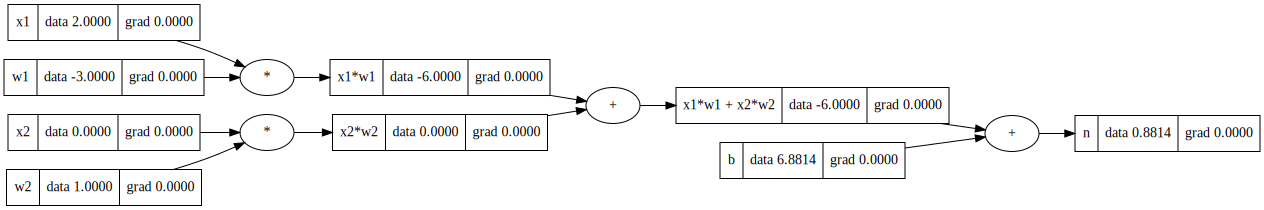

In [ ]:
draw_dot(n)

In [ ]:
o = n.tanh();
o.label = 'o';

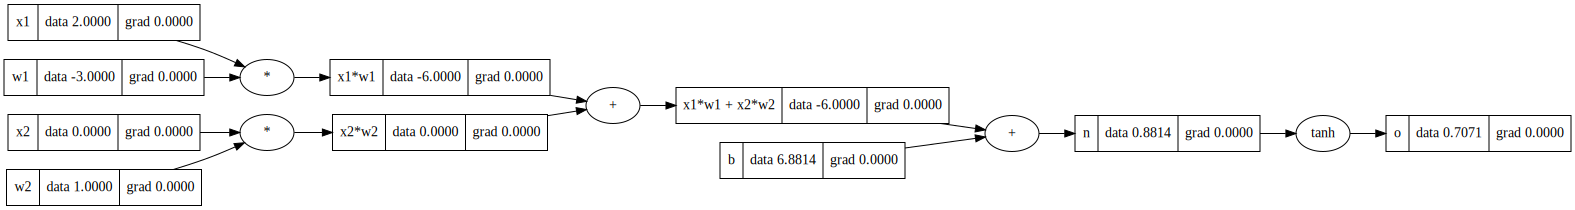

In [ ]:
draw_dot(o)

The code represents a simplified model of a single artificial neuron. Let's break down the components and their analogies in neural networks:

1. **Inputs \((x1, x2)\)**: These represent the input features to the neuron. In a neural network, these would correspond to either the raw input data (for input layer neurons) or the outputs of neurons from the previous layer.

2. **Weights \((w1, w2)\)**: These are the parameters the model learns during training. They represent the strength or importance of the respective input values. In a biological neuron, these can be thought of as analogous to synaptic strengths.

3. **Bias \((b)\)**: The bias allows the neuron to shift the activation function to the left or right, which can be crucial for successful learning. It's a kind of offset for a neuron.

4. **Linear Combination \((x1 \times w1 + x2 \times w2 + b)\)**: Before applying the activation function, the neuron computes a weighted sum of its inputs. This is the linear combination of inputs, weights, and bias.

5. **Activation Function (tanh in this case)**: Once the neuron computes the linear combination, it's passed through an activation function. The `tanh` function is used here, which introduces non-linearity to the neuron's output. This non-linearity allows neural networks to model more complex relationships in the data.

The output \(o\) is the final activated value from the neuron, which can be passed to subsequent layers in a neural network or used as a final output in the case of a single-layer network.

In essence, this code captures the fundamental operations of a neuron: weighted input summation followed by an activation. It's a foundational building block of neural networks.

---

## Weights and gradients

Weights and gradients serve different roles in the context of neural networks, though they are both crucial to the learning process. Let's distinguish between them:

1. **Weights**:
   - The weights in a neural network represent the strength or importance of particular nodes or connections.
   - They are parameters that the model learns during training. Initially, they might be set randomly or using some initialization technique.
   - The goal of training a neural network is to adjust these weights to minimize the difference between the predicted output and the actual target values.
   - In the context of your neuron example, weights (\( w1, w2 \)) determine how much influence each input (\( x1, x2 \)) has on the neuron's output.

2. **Gradients**:
   - Gradients are essentially derivatives. They represent the rate of change of the loss with respect to the weights (or other parameters).
   - During training, we compute the gradients to understand how to adjust the weights to improve the model's performance. If a weight's gradient is positive, increasing that weight will increase the loss, and decreasing it will decrease the loss (and vice-versa for a negative gradient).
   - Gradients guide the optimization process, helping determine the direction and magnitude of changes to be made to the weights during each iteration.
   - In the context of backpropagation, gradients are propagated backward through the network to adjust weights and biases.

While weights are the parameters we aim to optimize, gradients provide the direction and magnitude to adjust those weights during training. In the previous examples, gradients were computed using backpropagation and the chain rule to determine how to update weights to minimize the loss.

In the previous examples, the `Value` class was used to represent any value (or node) in the computational graph, not just weights. The `.data` attribute of the `Value` class held the actual numeric value of that node.

When you constructed the simple neural network:

1. The `Value.data` attributes for \( x1 \), \( x2 \) represented input values.
2. The `Value.data` attributes for \( w1 \), \( w2 \) represented weights.
3. The `Value.data` attribute for \( b \) represented the bias.
4. Intermediate computations like \( $x1 \times w1$ \) also had their results stored in `Value.data`.

So, while weights were represented using `Value.data` (in the case of \( w1 \) and \( w2 \)), not all `Value.data` values were weights. The `Value` class was a general structure to hold any value in the computational graph, and its purpose was to facilitate building and manipulating the graph, as well as to enable backpropagation through it.

## Slow-motion backpropagation

### Loss function

We know $\frac{do}{do} = 1$

### Tanh activation function.


Let's break down the backpropagation process for the tanh activation function.

Given:

$ o = \tanh(n) $

The derivative of the hyperbolic tangent function, \($\tanh(x)$\), with respect to its input \(x\) is:

$$ \frac{d\tanh(x)}{dx} = 1 - \tanh^2(x) $$

This is the local gradient for the tanh activation function.

Now, for our specific node \( o \), which is the result of \($\tanh(n)$\), the local derivative (or local gradient) would be:

$$ \frac{do}{dn} = 1 - \tanh^2(n) $$

This local derivative represents how much the output \( o \) changes for a small change in its input \( n \).



In [ ]:
o.grad = 1.0

In [ ]:
# o = tanh(n)
# do/dn = 1 - tanh(n)**2
# do/dn = 1 - o**2
# n.grad = 1 - o.data**2
n.grad = 1 - o.data**2
n.grad

0.4999999999999999

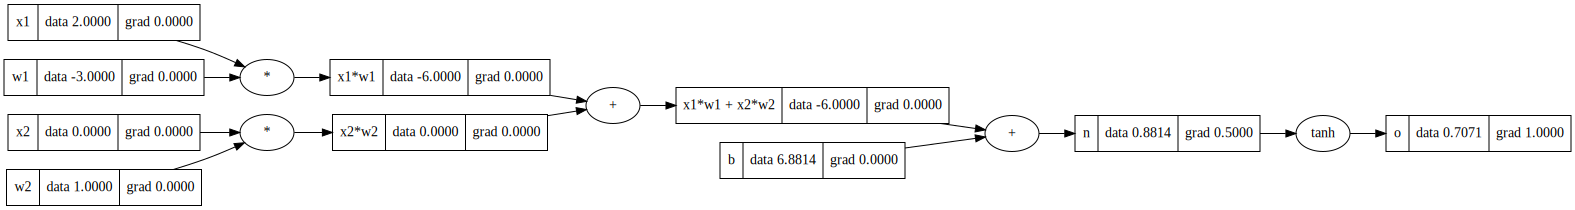

In [ ]:
draw_dot(o)

## The "+" node (again)

Now, let's move one step back in the computational graph to understand how the gradient flows through the "+" node, \( $x1w1*x2w2 + b$\).

For a "+" node, the operation is element-wise addition. The important property of addition in terms of differentiation is that its derivative with respect to any of its operands is 1. Essentially, a unit of change in any operand of the addition results in a unit change in the result of the addition. Therefore, when you backpropagate through an addition node, the gradient doesn't change.


Given that you've already computed \( n.grad \), you can directly assign this value to the gradients of both \( $x1w1*x2w2$ \) and \( $b$ \). This means the gradient simply "flows backward" through the "+" node without any change:

```
x1w1x2w2.grad = n.grad
b.grad = n.grad
```

In summary, when backpropagating through an addition node, the gradient is distributed equally to all its inputs.


In [ ]:
x1w1x2w2.grad = n.grad
b.grad = n.grad

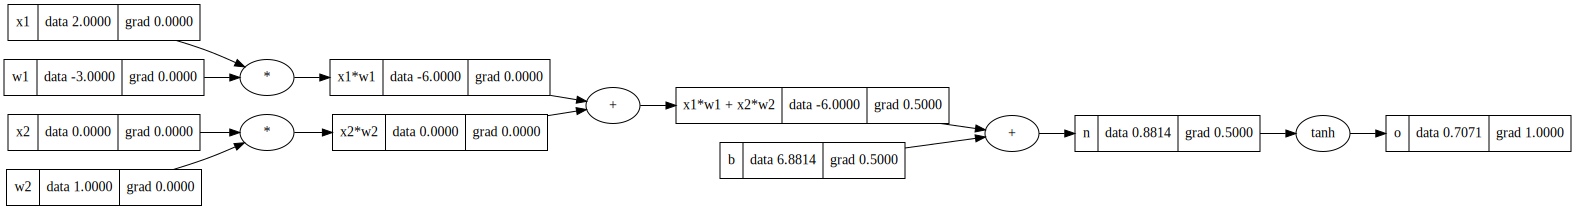

In [ ]:
draw_dot(o)

In [ ]:
# Another "+" node
x1w1.grad = x1w1x2w2.grad
x2w2.grad = x1w1x2w2.grad

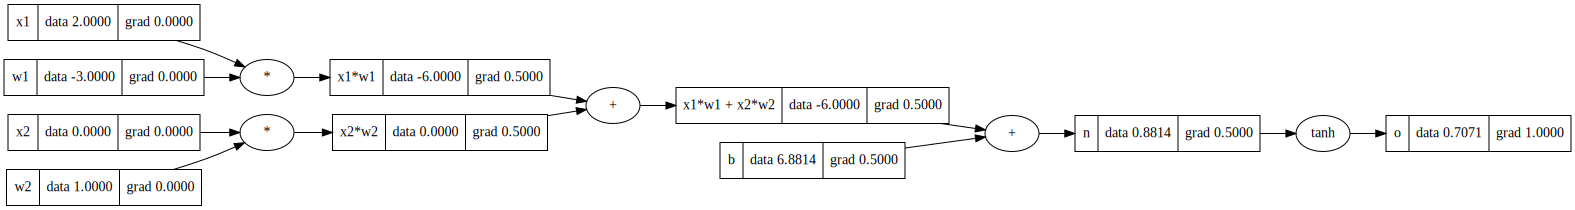

In [ ]:
draw_dot(o)

In [ ]:
# Multiplication node
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

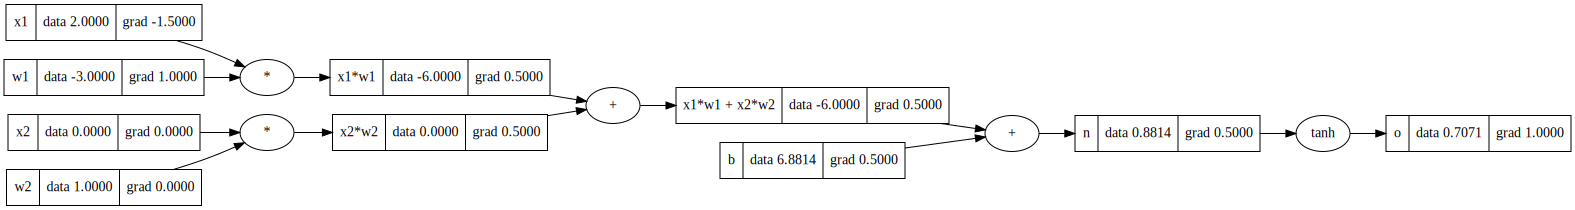

In [ ]:
draw_dot(o)

In [ ]:
# Multiplication node
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

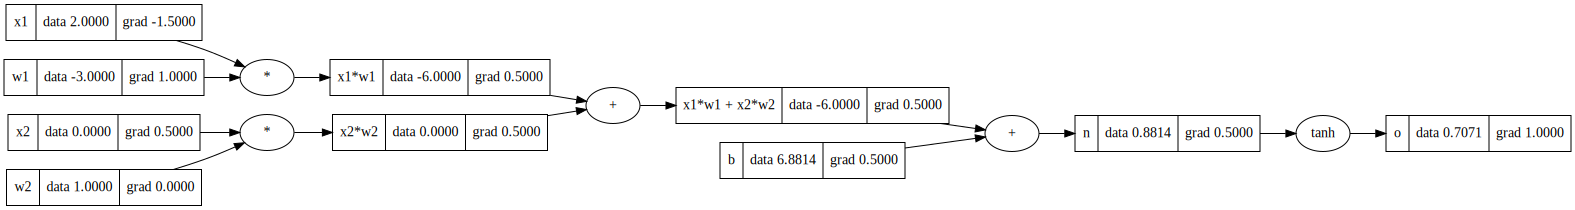

In [ ]:
draw_dot(o)

# Adding backward()

## Manual Backpropagation with the Enhanced `Value` Class

In this section, we're enhancing our basic computational graph structure to more seamlessly handle the process of backpropagation. The `Value` class, which represents nodes in our computational graph, will now have built-in functionality to propagate gradients backward, allowing for a more intuitive and direct calculation of derivatives. Here's a brief outline of the modifications and the reasoning behind them:

1. **Adding Backward Functionality**:
    - Each `Value` instance now has a `_backward` method. This method contains the logic to compute the gradient of that particular operation and pass it backward to its inputs.
    - The `_backward` method gets defined during each operation (like addition or multiplication) and is based on the derivative of that operation.

2. **Enhanced Operations**:
    - Operations like addition (`__add__`), multiplication (`__mul__`), and the activation function `tanh` now not only compute the output but also define how to compute the gradient for their respective inputs during backpropagation.
    - For instance, in the multiplication operation, the gradient is distributed to its operands based on the value of the other operand.

3. **Backpropagation in Action**:
    - After constructing the computational graph and computing the forward pass (resulting in some output or loss), we set the gradient of the final output node (typically representing the loss) to 1.
    - We then invoke the `_backward` method of the output node, which will recursively call the `_backward` methods of its input nodes, distributing gradients based on the operation's derivative. This continues until all nodes in the graph have received their gradient.
    - This design encapsulates the logic for gradient computation within each operation, making the process modular and intuitive.

In the upcoming steps, by creating a computational graph using this enhanced `Value` class and then invoking the backward functionality, we will witness the gradients flow backward through the graph, solidifying our understanding of backpropagation.

In [ ]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out


In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron, the 6.88 values means our back propagation will have good numbers!
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

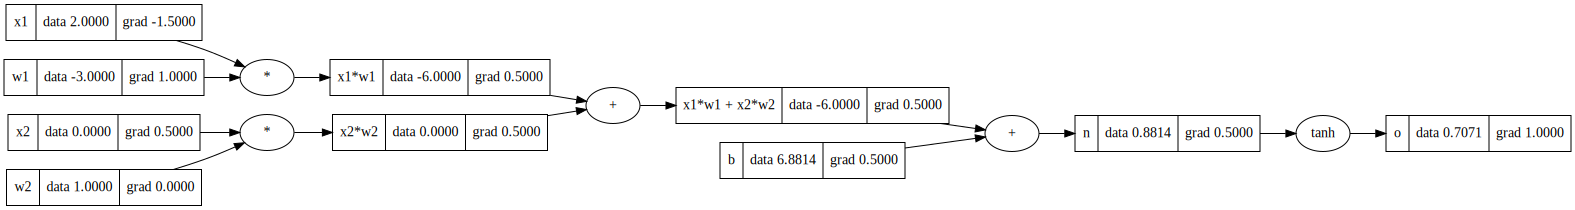

In [ ]:
draw_dot(o)

In [ ]:
o.grad = 1.0
o._backward()

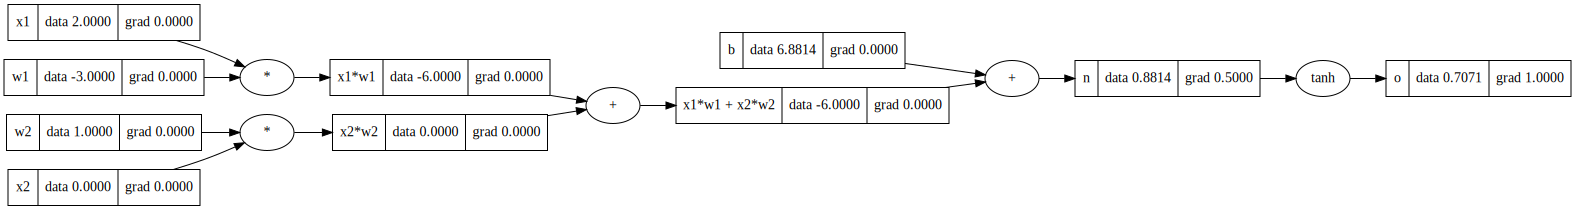

In [ ]:
draw_dot(o)

In [ ]:
n._backward()
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()

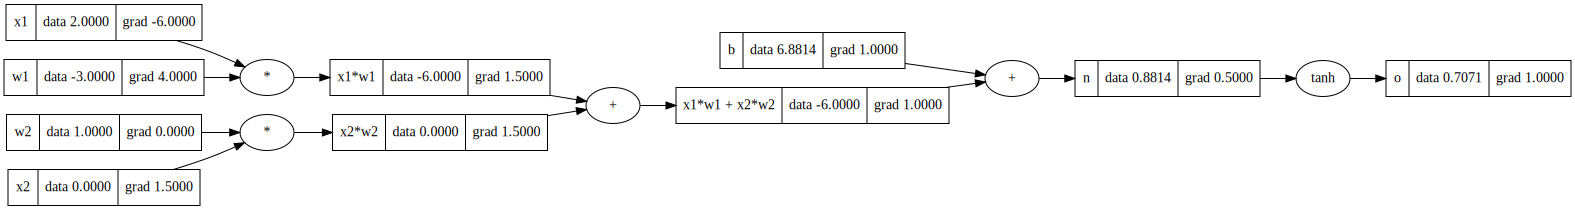

In [ ]:
draw_dot(o)

## Topological Sort and its Application in Backpropagation

#### What is Topological Sort?

Topological sort is an algorithm used to linearly order the vertices of a directed acyclic graph (DAG) such that for every directed edge \( (u, v) \), vertex \( u \) comes before vertex \( v \) in the ordering. Essentially, it provides a linear ordering of the vertices in a way that respects the directed edges of the graph. If the graph contains a cycle, then no linear ordering exists, and hence, topological sorting cannot be applied.

#### How is it Relevant to Backpropagation?

1. **Computational Graph as a DAG**: Neural networks, or more generally, any computational graph we build for differentiable programming, can be represented as a DAG. The nodes represent computations or variables, and the edges represent the flow of data.

2. **Order of Computation**: Just as in the forward pass we need to compute values in a certain sequence (you can't compute the output of a neuron before computing its inputs), in the backward pass, gradients must be computed in a specific order. Topological sorting provides the correct order for these computations.

3. **Efficiency**: Computing gradients using backpropagation involves propagating the gradient backward through the graph. By using a topological sort, we ensure that every node's gradients are computed only after the gradients of the nodes that depend on it have been computed. This eliminates redundant calculations and ensures that each node's backward method is called exactly once.

#### Why Use Topological Sort in Backpropagation?

1. **Systematic Gradient Calculation**: By processing nodes in topological order, we ensure that when we compute the gradient for a node, the gradients for all the nodes it depends on have already been computed. This ensures that the chain rule is applied systematically.

2. **Avoid Redundancy**: Without a topological order, we might end up in situations where we compute the gradient for a node multiple times or in an incorrect order, leading to errors or inefficiencies.

3. **Clarity and Structure**: Using topological sort provides a structured approach to backpropagation. It's clear which gradients need to be computed first, and this reduces the chance of errors.

In conclusion, topological sort offers a systematic and efficient way to perform backpropagation on a computational graph, ensuring that each node's gradient is computed in the correct order and precisely once.

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron, the 6.88 values means our back propagation will have good numbers!
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

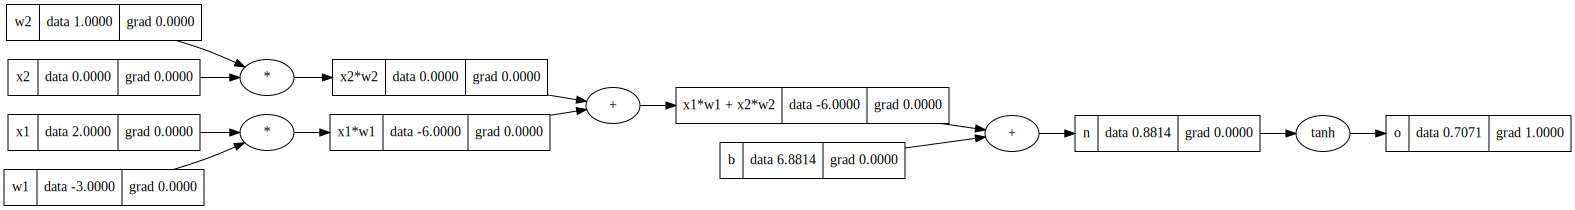

In [ ]:
o.grad = 1.0
draw_dot(o)

In [ ]:
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

for node in reversed(topo):
  node._backward()

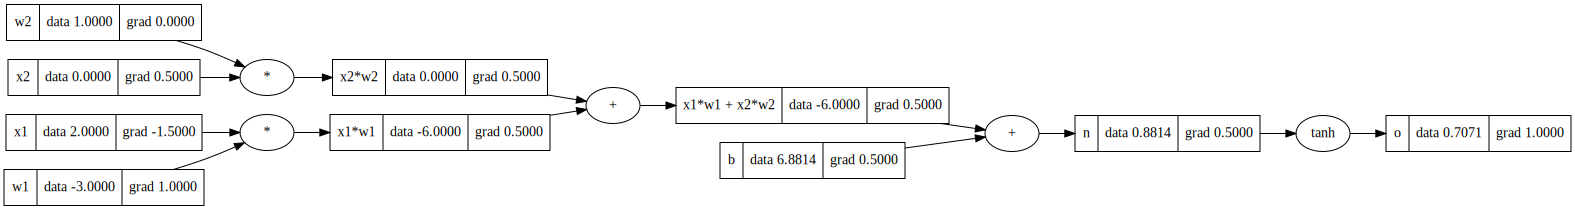

In [ ]:
draw_dot(o)

In [ ]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron, the 6.88 values means our back propagation will have good numbers!
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

In [ ]:
o.backward()

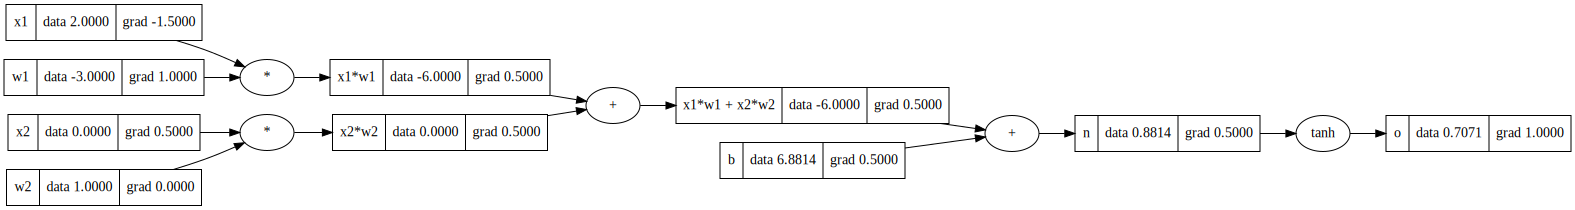

In [ ]:
draw_dot(o)

# Glossary

## What is a Derivative?

In its most basic form, the derivative measures how a function changes as its input changes. Imagine driving a car on a straight road. If you were to graph the distance you traveled over time, the speed of the car at any given moment would be the rate at which the distance is changing with respect to time. This rate of change is essentially what the derivative captures.

### Intuitive Analogy

Picture a curve representing a function on a graph. Now, choose a point on that curve. The derivative at that point is the slope of the tangent line to the curve at that point.

- If the curve is rising, the derivative is positive (the function is increasing).
- If the curve is flat, the derivative is zero (the function is not changing).
- If the curve is falling, the derivative is negative (the function is decreasing).

## Importance of the Derivative

1. **Understanding Rate of Change**: At its core, calculus is about understanding change. The derivative provides a precise way to talk about how a function is changing at any given point.

2. **Optimization Problems**: In many real-world problems, we want to find maximum or minimum values. For instance, businesses might want to maximize profit or minimize costs. The points where these maxima or minima occur often correspond to where the derivative is zero (or undefined).

3. **Modeling and Predictions**: Derivatives are foundational in physics, economics, biology, and more. They can describe motion, rates of infection, or changes in market demand, among other things.

4. **Neural Networks and Machine Learning**: In the context of your tutorial, derivatives are crucial in the training of neural networks. When training a neural network, we want to adjust its parameters (weights and biases) to minimize the error in its predictions. This process, called backpropagation, involves computing the gradient (a multi-dimensional derivative) of the error with respect to the parameters. By understanding how a small change in a parameter affects the error, we can adjust that parameter in the direction that reduces the error.

5. **Numerical Methods**: Many algorithms, like the Newton-Raphson method for finding roots of functions, rely on derivatives to make approximations and converge to solutions.

In summary, the derivative provides a tool to understand and quantify the instantaneous rate of change. This concept, while seemingly simple, has profound implications across various disciplines and is foundational in the field of calculus.

## Tangent Line and Slope:

Imagine you have a curve on a graph, and you pick a specific point on that curve. If you were to draw the straightest possible line that just "touches" the curve at that point (without cutting across it), you'd have what's called a "tangent line" to the curve at that point.

The slope of this tangent line represents the rate at which the function is changing at that specific point. This is what we mean by "the derivative of a function at a point is the slope of the tangent line to the curve at that point."

### What Does a Slope of 15 Mean?

The slope represents a ratio of the change in the vertical direction (often denoted as \( $\Delta y$ \)) to the change in the horizontal direction (often denoted as \( $\Delta x$ \)). If the slope of the tangent line at a point is 15, it means that for a tiny increase in the horizontal direction (input of the function), the vertical increase (output of the function) is 15 times that tiny increase. In more practical terms, for every unit increase in the x-direction, the function increases by 15 units in the y-direction at that point.

Mathematically, if you have a slope \( m \) for a line, it can be represented as:
\[ m = $\frac{\Delta y}{\Delta x}$ \]
So, for a slope of 15, \( $\Delta y$ \) is 15 times \( $\Delta x$ \).

### Is Slope the Output of a Derivative?

Yes, when you compute the derivative of a function at a specific point, the value you get is the slope of the tangent line to the curve at that point. If you were to compute the derivative for every point along a function and then plot these values, you'd get a new function: the derivative function. The values of this derivative function at any given point represent the slope of the original function at that point.

## Trigonometry Basics:

The concept of the tangent line in calculus is related to the trigonometric function "tangent" (often abbreviated as "tan"), which in turn is related to sine and cosine. Here's the connection:

In a right triangle:
1. \( $\sin(\theta)$ \) is the ratio of the length of the side opposite the angle \( $\theta$ \) to the length of the hypotenuse.
2. \( $\cos(\theta)$ \) is the ratio of the length of the adjacent side (the side next to \( $\theta$ \) but not the hypotenuse) to the length of the hypotenuse.
3. \( $\tan(\theta)$ \) is defined as the ratio of \( $\sin(\theta)$ \) to \( $\cos(\theta)$ \). Thus:

$$
\tan(\theta) = \frac{\sin(\theta)}{\cos(\theta)}
$$


## Gradient and Backpropagation

When training a neural network, one crucial step is to update the weights to minimize the loss. To determine how each weight should be adjusted, we compute the derivative (or gradient) of the loss with respect to each weight. This process is called backpropagation.

In this tutorial, a foundation of a computational graph is built using the `Value` class. Each instance of this class represents a node in the graph, and these nodes can be combined through operations like addition and multiplication.

---

### Training a neural network

When training a neural network, our primary objective is to minimize the loss or error. The weights and biases of the network are the adjustable parameters that determine the network's output and, consequently, the value of the loss. We want to know how a small change in a particular weight (or bias) will affect the overall loss. This understanding helps us adjust the weight in the direction that will reduce the loss.

So, when we ask for the derivative of \( L \) with respect to a weight \( w \) (i.e., \( $\frac{dL}{dw}$ \)), we're essentially asking: "If I change \( w \) a tiny bit, how much will \( L \) change?"

1. If \( $\frac{dL}{dw}$ \) is positive, it means that increasing \( w \) will increase \( L \). To reduce the loss, we should then decrease \( w \).
2. If \( $\frac{dL}{dw}$ \) is negative, it indicates that increasing \( w \) will decrease \( L \). In this case, to reduce the loss, we should increase \( w \).

On the other hand, the derivative \( $\frac{dw}{dL}$ \) would be answering a different, and less useful, question: "If the loss changes by a tiny amount, how would the weight change?" This isn't what we're looking for, as the loss is a result of the weights (and the input data), not the other way around. The weights are our adjustable parameters, and the loss is the metric we're trying to optimize.

In summary, we use \( $\frac{dL}{dw}$ \) because we want to understand how changes to our network's weights will impact the loss, so we can adjust the weights to minimize that loss.

---

### Derivatives in the Graph

1. \( L \) is the final output (or Loss) that we want to minimize.
2. The derivative of \( L \) with respect to itself, \( $\frac{\partial L}{\partial L}$ \), is 1 since any quantity differentiated with respect to itself is 1.
3. For other nodes (like \( d, f, e, b, a \)), the derivative with respect to \( L \) tells us how much a small change in that node's value will change \( L \). This information is crucial when updating weights in a neural network.

---

### The `.grad` Attribute

In the `Value` class:
- The `.grad` attribute stores the gradient, which is the derivative of \( L \) concerning the value of that specific node.
- For instance, `d.grad` will store \( $\frac{\partial L}{\partial d}$ \), representing how much the loss \( L \) will change for a small change in \( d \).

---

### Numerical Estimation

While backpropagation provides an exact computation of the gradients using the chain rule from calculus, gradients can also be estimated using the difference quotient:

$$
\frac{f(x+h) - f(x)}{h}
$$

By using a very small value for \( h \) (e.g., 0.0001), we can get a numerical approximation of the gradient. This method is often used to verify the correctness of backpropagation computations.

---


## Numerical Gradient Estimation: The Difference Quotient

Before diving into the more sophisticated method of backpropagation, it's useful to understand the fundamental concept of a gradient from a numerical perspective. One straightforward way to estimate the gradient is by using the difference quotient, which can be thought of as a numerical approximation of a derivative.

The difference quotient for a function \( f \) at a point \( x \) is given by:

$$
\frac{f(x + h) - f(x)}{h}
$$

Where \( h \) is a small number. This formula gives an approximation of the slope of the function \( f \) at the point \( x \).

### Why Use Numerical Estimation?

1. **Intuition:** Before delving into the complexities of backpropagation, understanding how gradients can be computed numerically offers a tangible sense of how weights affect the loss.
2. **Verification:** Once you've computed gradients using backpropagation, it's common to verify the results using numerical gradient estimation to ensure everything is working correctly.

### What the Code Demonstrates:

The provided function `lol` is a practical implementation of the difference quotient for a small neural network-like computational graph. Specifically, it computes the gradient of the loss \( L \) with respect to the weight \( a \).

Here's a step-by-step breakdown:

1. **Setup:** The function first sets a small value for \( h \) (0.001 in this case).
2. **Compute Original Loss:** It then constructs the computational graph and computes the value of \( L \) (denoted as `L1`).
3. **Perturb the Weight:** Next, it slightly perturbs the weight \( a \) by adding \( h \) to it.
4. **Compute New Loss:** With the perturbed weight, the function computes the new value of \( L \) (denoted as `L2`).
5. **Estimate Gradient:** The gradient is then estimated as \( $\frac{L2 - L1}{h}$ \), which is printed out.

By running the function `lol`, you'll see the numerical estimate of how the loss \( L \) changes with a tiny change in weight \( a \). Later, when you compute the gradient using backpropagation, you can compare this value to ensure correctness.